# Modeling Risk Given CPA

In this exercise, I want to try to model the risk of collision of two vessels given their size, speed and CPA. 

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt


In [2]:
class vessel(object):
    def __init__(self,length,x,y,speed,heading):
        self.length = length
        self.pos = np.array([x,y])
        self.speed = speed
        self.heading = heading
        self.V = np.array([speed * np.sin(np.deg2rad(heading)),
                           speed*np.cos(np.deg2rad(heading))])
    
    def print(self):
        print("Vessel:")
        print("   pos:\t\t\t%0.3f,%0.3f" % (self.pos[0],self.pos[1]))
        print("   speed:\t\t\t%0.3f" % self.speed)
        print("   heading:\t\t\t%0.3f" % self.heading)
        print("   V:\t\t\t%0.3f,%0.3f" % (self.V[0],self.V[1]))
        print("")
              
    
    def cpa(self,vessel):
        '''
        Calculates the Closest Point of Approach (CPA) Between Two Vessels
        
        Parameters:
        ----------
        
        vessel: A vessel object of this type.
        
        Results:
        --------
        tcpa:    Time to CPA, negative indicates CPA has past.
        Vesselcpa: Coordinates of the other vessel at CPA
        Rcpa:    Range to the other vessel at CPA
        Bcpa:    Bearing to the other vessel at CPA
        
        Notes on the calculation:
        
        The progression of ownship and the vessel 
        are parameterized in time as follows:
        
        Xos(t) = Xo + Vx * t
        Yos(t) = Yo + Vy * t
        Xv(t) = Xvo + Vxt * t
        Yv(t) = Yvo + Vyt * t
        
        The the Range between the two vessels as a function
        of time is written as follows:
        
        R = sqrt( (Xv(t) - Xos(t))^2 + (Yv(t) - Yos(t))^2)
        
        The expressions above are substituted into R.
        
        R = sqrt( ((Xvo + Vxt * t) - (Xo + Vx * t))^2 +
                  ((Yvo + Vyt * t) - (Yo + Vy * t))^2)
                  
        Rearranging...
        
        R = sqrt( ((Xvo-Xo) + (Vxt-Vx)*t)^2 + 
                  ((Yvo-Yo) + (Vyt-Vy)*t)^2)
                  
        The CPA occurs when R is a minimum, so we take the
        first derivative wrt time, and set this to 0, and then solve
        for the time at which this occurs. 
        
        dR/dt = [2 * (Vxt-Vx) * ((Xvo-Xo) + (Vxt-Vx)*t) + 2 * (Vyt-Vy) * ((Yvo-Yo) + (Vyt-Vy)*t)] / R
        
        dR/dt equals 0 where numerator is 0, so we can drop R, and the 2 common to both terms. 
        Defining the vector, D, as the position of the vessel relative to ownship:
        D = (Xvo-Xo), (Vyt-Vy)
        and defining the vector, Vr, as the velocity of the vessel relative to ownship:
        Vr = (Vxt-Vx), (Vyt-Vy)
        then the time to cpa is given by:
        tcpa = -np.dot(Vr,D) / (Vr[0]**2 + Vr[1]**2)
        
        From this the position of the vessel and own ship can be calculated
        from the equations above, as well as the range and bearing 
        at which CPA will occur. 
        
        '''
        
        # Relative velocity vector:
        Vr = vessel.V - self.V
        # Relative position vector.
        D = vessel.pos - self.pos
        #print("Vr: %0.3f,%0.3f" % (Vr[0],Vr[1]))
        #print("R: %0.3f,%0.3f" % (R[0],R[1]))

        tcpa = -np.dot(Vr,D) / (Vr[0]**2 + Vr[1]**2)
        Vesselcpa = np.array([vessel.pos[0] + vessel.V[0] * tcpa,
                        vessel.pos[1] + vessel.V[1]*tcpa])
        OScpa = np.array([self.pos[0] + self.V[0] * tcpa,
                         self.pos[0] + self.V[1] * tcpa])
        CPA = Vesselcpa-OScpa
        Rcpa = np.linalg.norm(CPA)
        #Bcpa = np.arctan2(CPA[1],CPA[0]) * 180/np.pi - 90.
        Bcpa = self.bearingfromdxdy(CPA[0],CPA[1])


        return (tcpa,Vesselcpa,OScpa,Rcpa,Bcpa)
    
    def bearingfromdxdy(self,dx,dy):
        bearing = (np.arctan2( dx, dy) * 180/np.pi + 360) % 360
        return bearing
    
    def plotcpa(self,vessel,figure=None):
        
        (tcpa,Vesselcpa,OScpa,Rcpa,Bcpa) = self.cpa(vessel)
        
        if figure is None:
            F = plt.figure(figsize=(6,6))
        else:
            F = plt.figure(figure.number)
        plt.quiver(self.pos[0],self.pos[1],self.V[0],self.V[1],
                  angles='uv', scale_units='xy', scale=10,color = 'k')
        plt.quiver(vessel.pos[0],vessel.pos[1],vessel.V[0],vessel.V[1],
                  angles='uv', scale_units='xy', scale=10,color = 'b')
        plt.quiver(Vesselcpa[0],Vesselcpa[1],vessel.V[0],vessel.V[1],
                          angles='uv', scale_units='xy', scale=10, color = 'm')
        plt.quiver(OScpa[0],OScpa[1],self.V[0],self.V[1],
                          angles='uv', scale_units='xy', scale=10, color='r')
        plt.quiver(OScpa[0],OScpa[1],Vesselcpa[0]-OScpa[0],Vesselcpa[1]-OScpa[1],
                  angles='uv',scale_units='xy', scale=1,color='k',alpha=.1)
        plt.text(Vesselcpa[0],Vesselcpa[1],'CPA: Range:%0.2f\n        Bearing:%0.2f' % (Rcpa,Bcpa))
        plt.grid(True)
        return F
            
    def riskofcollision(vessel):
        '''Calculate the Risk of Collision
        
        How might we do this? 
        We can calculate the CPA to the vessel.
        Then calculate the '''

    def courses_to_collide(self,vessel,N=10,minSpeed=2.,maxSpeed=25):
        '''Calculate N speeds and headings for vessel that will ensure a collision.
        
        Parameters:
        ----------
        vessel:  Vessel object for whom speeds and headings are calculated.
        N:   Number of solutions sought.
        minSpeed:   Minimum speed considered.
        maxSpeed:   Maximum speed consdiered.
        
        '''
        D = vessel.pos - self.pos

        # Confine a to values between 2 and 25 knots.
        Dnorm = np.linalg.norm(D)
        N = 10.
        max_a = maxSpeed/Dnorm
        min_a = minSpeed/Dnorm
        a = np.arange(min_a,max_a,(max_a-min_a)/N)


        Vt = [-D * x + v1.V for x in a]
        Speeds = np.array([np.linalg.norm(x) for x in Vt])
        Headings = np.array([v1.bearingfromdxdy(x[0],x[1]) for x in Vt])
        return (Speeds, Headings)

Vessel:
   pos:			0.000,0.000
   speed:			5.000
   heading:			90.000
   V:			5.000,0.000

Vessel:
   pos:			10.000,10.000
   speed:			5.000
   heading:			270.000
   V:			-5.000,-0.000



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

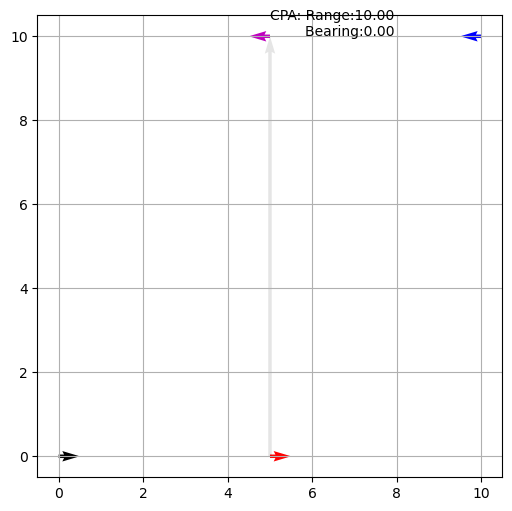

In [3]:
v1 = vessel(10,0,0,5,90)
v2 = vessel(10,10,10,5,270)
v1.print()
v2.print()
(tcpa,Vesselcpa,OScpa,Rcpa,Bcpa) = v1.cpa(v2)
v1.plotcpa(v2)

Ok, now we have a vessel class and the ability to calcualte CPA between two vessels. 

So now we turn our consideration to how to estimate the risk of collision. It is not immediatley clear how to do this so let us experiment with some ideas. 

First lets consider a vessel at some range, heading and speed. We can calculate it's CPA and, if our estimates about it's current state are true and remain unchanged, as long as the CPA is larger than the combined dimentions of our ships we won't collide. This is a pretty weak criterion, but mathimatically it is true. But the purpose of calculating a CPA is really asking the question, what happens if 1) my assumptions about the vessel's current range, heading and speed are incorrect and/or 2) my assumption that he will continue on that path is incorrect. Assuming my current CPA calcualtion is non-zero, it requires one of these assumptions to be incorrect for a collision to actually occur. (Technically it is also true that my estimate of my own position, heading and speed could be incorrect, but we will assume they are not for now.)

So lets consider the case in which our estimate of the vessel's position, heading and speed are incorrect. What we'd like to do is solve for the conditions in which the CPA is zero. When the CPA is zero, the relative velocity vector, `Vr`, points directly from the vessel toward ownship. If `D`, is the vector from ownship to the vessel, then `Vr` must point in the opposition direction of `D`, `-D`. There is no constraint on the magnitude of the relative velocity vector, only on its directon. The one can write `Vr` as 

`Vr = -D a`

where `a` is a positive scalar value. The vessel speed, `Vt` is given in terms of the relative velocity vector and ownship vector as 

`Vt = Vr + Vos`

or

`Vt = -D a + Vos`

Remember, `a` is a scalar value here, all others are vectors. Lets look at how Vt varies as we vary a. Since there are an infinite number of solutions, we'll only consider those for which the maximum speed is 25 knots, under the assumption that it's unlikely for most vessels to go faster. 

In [4]:
v1 = vessel(10,0,0,5,90)
v2 = vessel(10,10,10,5,270)
trueHeading = v2.bearingfromdxdy(v2.V[0],v2.V[1])
trueSpeed = np.linalg.norm(v2.V)
D = v2.pos - v1.pos

# Confine a to values between 2 and 25 knots.
Dnorm = np.linalg.norm(D)
minSpeed = 2.
maxSpeed = 25.
Nsteps = 10.
max_a = maxSpeed/Dnorm
min_a = minSpeed/Dnorm
a = np.arange(min_a,max_a,(max_a-min_a)/Nsteps)


Vt = [-D * x + v1.V for x in a]
Speeds = np.array([np.linalg.norm(x) for x in Vt])
Heading = np.array([v1.bearingfromdxdy(x[0],x[1]) for x in Vt])
plt.figure()
plt.subplot(411)
plt.plot(a,Speeds,'.')
plt.grid(True)
plt.ylabel('Speed')
plt.subplot(412)
plt.plot(a,Heading,'.')
plt.grid(True)
plt.ylabel('Heading')
plt.subplot(413)
plt.plot(a,Heading - trueHeading,'.')
plt.grid(True)
plt.ylabel('Heading Error')
plt.subplot(414)
plt.plot(a,Speeds - trueSpeed,'.')
plt.grid(True)
plt.ylabel('Speed Error')


vs = []

vessel(10,10,10,5,270)
z = 0
for s,h in zip(Speeds,Heading):
    v = vessel(10,10,10,s,h)
    if z == 0:
        Fig = v1.plotcpa(v)
    else:
        Fig = v1.plotcpa(v,figure=Fig)
    z+=1
    

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Here we've plotted curves that describe how our current estimate of the heading and velocity of the vessel would have to be in error to give us a zero CPA and result in a collision. For this example, the heading error would have to be huge, off by more than 60 degrees. And while the speed error could be quite small to get zero CPA for speed estimates error less than 3 knots, the heading would have to be off by more than 75 degrees.  

Since it seems unlikely that our estimate of the heading and speed of the vessel are both simultaneously in error by this much, we could say the risk of collision is quite small. If we knew the uncertainty in our estimates of those values, we could calculate the probably of collision by calculating the probability that our speed and heading estimates are off by the required amount. 

Assume for the moment that our heading estimate has an error of sigmaH = 30 degrees, and our speed estimate has an error of sigmaS = 3 knots, and they are Normally distributed. Then we could calculate the probablity that the both are in error by the amount required for each combination of heading and speed required to collide.  

In [122]:
import scipy.stats

sigmaH = 30
sigmaS = 3
HeadingD = scipy.stats.norm(trueHeading,sigmaH)
SpeedD = scipy.stats.norm(trueSpeed,sigmaS)

# Not clear which might be more correct.
#HeadingProb = HeadingD.cdf(Heading+5 - trueHeading) - HeadingD.cdf(Heading-5 - trueHeading)
#SpeedProb = SpeedD.cdf(Speeds+2 - trueSpeed) - SpeedD.cdf(Speeds-2 - trueSpeed)
HeadingProb = HeadingD.pdf(Heading - trueHeading)
SpeedProb = SpeedD.pdf(Speeds - trueSpeed) 


# Under the assumption the heading and speed estimates
# are uncorrelated, independent random variables (they are not)
# These are multiplied because the vessel cannot just chaange
# heading. It must also change speed to collide. 
Risk = HeadingProb * SpeedProb
plt.figure()
plt.plot(a,Risk,'.')
plt.grid(True)
plt.ylabel('Risk')

Text(0, 0.5, 'Risk')

In this case, there is nearly zero risk of collision resulting from an error in our estimates of speed and heading. 

REVISIT THIS CALCULATION: Seems like maybe I should calculate the probability of getting a particular value as the integral under the pdf over a small band centered on the value. Did this with the CDF's. Still not sure...

The risk calculation thus far is based on the probablity that our model of the vessel is incorrect at this instant. But we have not yet consdiered the risk associated with the vessel's course and/or speed changing in the future. The only way we can collide with this vessel is if our model at this instant is incorrect such that the CPA is actually 0, or if the model changes reducing the CPA to zero in the future. 

At first it seems reasonable that we need only need to consider what might happen between now CPA, as it is during this approach that a change in the vessel's heading is likely to close CPA to zero. It seems that a change in heading and speed after this point would require a huge course change, > 90 degrees, and that this change would be exceedingly unlikely. But after thiking about it more one can consider a the situation in which ownship is overtaking another vessel. In that case, even after CPA, if the vessel simply slows a collision could be immanent. So we need to consider this risk for a period longer than just through CPA. Exactly how long is unclear as yet. 

For whatever duration into the future we wisht to consider, we could imagine that at some point the vessel's course and speed might change to create zero CPA. If the vessel makes no change in course and speed, we know the path it will take relative to ownship, closing until CPA is reached and then opening again. We can then step along this path at some regular interval and evaluate an ensemble of changes in speed and heading to create zero CPA at each step. We then have to calculate what the probabilty might be that the vessel would actuallly make that speed and heading change. 

The probability that the vessel would make a speed and heading change to create a zero CPA situation is going to depend on the intent of the vessel's pilot and to some extent the capabilty of the vessel. A pilot might change course to avoid another vessel or a shoal or some navigation objective, and inadvertently create a zero CPA situation.  While maybe not quite impossible, it seems that it will likely be very difficult to assess the intent of another vessel to assess the risk of collision. There might be some notable and interesting exceptions, however, that include vessels in an traffic separation scheme, navigating on a range, or constrained by their draft to maneuver. In these cases, there is likely some choices of heading and speed that are so undesirable as to be unlikely to be chosen by the pilot. Thus the risk of colliding with a vessel who is maintaining a course to match a navigation range, for example, is quite small, as they are unlikely to change course to intercept you. For now, let us leave this consideration to future work. 

It is also true that some changes in heading and speed are unlikely, simply because of the physics of the maneuver. Large ships, having a large angular moment of inertia, simply do not turn fast. The same is generally true of small boats transiting at speed. Thus we can put some limits on the size of the heading change that is likely to occur. 

How then do we assess the probabiliy of a maneuver that is not constrained by the environment, size of the vessel, or its current heading and speed? Are small course and speed changes more likely than large ones, all else being equal? Certainly, vessels transitting and not otherwise constained rarely make heading changes that exceed 60 degrees, as it would be inefficinet to do so. This assumption may not hold true for fishing vessels whose intent may be more erratic. But as a place to start lets stick with this assumption. 

What I want to do is create a probabilty distrubtion function that describes the likelyhood of a heading change from the current heading, given the capability of the vessel and the size of the change. So we need pdfs for each. 

Lets assume the probability of a change in heading as a function of vessel size is Normally distrubuted with mean equal to the current heading and standard deviation equal to the this expression, which is just an empirical guess. Here I'm giving the sigma value a minimum of 10 degrees and adding a penalty that scales inversely with the product of the vessels's speed and length. 


In [133]:

sigma = lambda s,l : 10 + 90/(s*l*.05)


speeds = np.arange(1,20,1)
lengths = np.arange(10,100,10)
plt.figure()

for length in lengths:
    plt.plot(speeds,sigma(speeds,length))
    plt.xlabel('speed, kts')
    plt.ylabel('1-sigma heading change probability')
    plt.title('1-sigma heading change probability for various vessel sizes and speeds.')
    plt.grid(True)
    plt.text(1,sigma(speeds,length)[0],"%sm" % length)

Lets create a lambda function that will return the probability of a turn using this model. 

Then we can revist the meeting of two vessels - this time lets separate them by 1000 m in x and y - one going east and the other going west. We'll consider v1 our ownship, and v2 the contact vessel as before. Then we can calculate CPA for the encounter. Next we can create two model vessels and step their position in time in 1 second increments until 2*CPA, and at each step we can calculate 10 combinations of heading and speed, allowing speed to vary from 2-25 knots, that will collide with our ship if they were taken from that point. Finally we can score the likelihood that the vessel makes this course change using the model we just defined. For the moment, we are neglecting the assigning any probabilty to a change in speed - we allow anything there.

In [160]:

P_H_vessel = lambda v, H: scipy.stats.norm(v.heading,sigma(v.speed,v.length)).pdf(H)


v1 = vessel(10,0,0,5,90)
v2 = vessel(10,1000,1000,5,270)
hh = np.arange(210,330)
plt.figure()
plt.plot(hh,P_H_vessel(v2,hh),'.')
plt.grid(True)
sigma(v2.speed,v2.length)

(tcpa,Vesselcpa,OScpa,Rcpa,Bcpa) = v1.cpa(v2)
tt = np.arange(tcpa*2)
v1model = vessel(10,0,0,5,90)
v2model = vessel(10,1000,1000,5,270)
plt.figure()
fig,axs = plt.subplots(2,1)
for ti in tt:
    # Move our vessels along in time.
    v1model.pos = v1.pos + v1.V * ti
    v2model.pos = v2.pos + v2.V * ti
    (Cspeeds,Cheadings) = v1model.courses_to_collide(v2model,N=10,minSpeed=2.,maxSpeed=25)
    prob_of_Heading = P_H_vessel(v2model,Cheadings)
    plt.sca(axs[0])
    plt.plot(np.ones((10))*ti,prob_of_Heading,'.')
    plt.sca(axs[1])
    plt.plot(np.ones((10))*ti,Cheadings-v2.heading,'.')

It is not clear that this result totally makes sense. The horizontal axis is the time step from the current time. The vertical axis is the probability that the vessel would make a heading change. And for each time step, the probability of making each of the 10 proposed heading changes that would result in a collision if taken is plotted. CPA occurs at 100 seconds. The sigma-value for our heading change probability function is 46 degrees. 

In [152]:
sigma(v2.speed,v2.length)

46.0

In [153]:
Rcpa

999.9999999999999